In [1]:
#This is for Rohith Sharma's data
# Importing Libraries
import pandas as pd
import numpy as np

In [2]:
# Importing the dataset
cricket_data= pd.read_csv("all_matches.csv")

C:\Users\gogat\AppData\Local\Temp\ipykernel_30604\4006547997.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  cricket_data= pd.read_csv("all_matches.csv")


In [3]:
cricket_data.tail(5)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
200659,1254086,2021,2021-05-02,"Narendra Modi Stadium, Ahmedabad",2,17.2,Delhi Capitals,Punjab Kings,SO Hetmyer,S Dhawan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200660,1254086,2021,2021-05-02,"Narendra Modi Stadium, Ahmedabad",2,17.3,Delhi Capitals,Punjab Kings,SO Hetmyer,S Dhawan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200661,1254086,2021,2021-05-02,"Narendra Modi Stadium, Ahmedabad",2,17.4,Delhi Capitals,Punjab Kings,SO Hetmyer,S Dhawan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200662,1254086,2021,2021-05-02,"Narendra Modi Stadium, Ahmedabad",2,17.5,Delhi Capitals,Punjab Kings,SO Hetmyer,S Dhawan,...,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200663,1254086,2021,2021-05-02,"Narendra Modi Stadium, Ahmedabad",2,17.6,Delhi Capitals,Punjab Kings,SO Hetmyer,S Dhawan,...,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
cricket_data.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed'],
      dtype='object')

In [5]:
#Filtering rows where Virat Kohli is the striker
rohith_batting_data = cricket_data[cricket_data['striker'] == 'RG Sharma']

#Calculating the number of balls faced and runs scored by Rohith
rohith_batting_stats = rohith_batting_data.groupby(['start_date', 'match_id', 'venue', 'innings','bowling_team']).agg({
    'ball': 'count',
    'runs_off_bat': 'sum',
}).reset_index()

#Calculating boundaries (4s and 6s), half-centuries, and centuries
rohith_batting_data['boundary_count'] = rohith_batting_data['runs_off_bat'].apply(lambda x: 1 if x == 4 else 0)
rohith_batting_data['sixer_count'] = rohith_batting_data['runs_off_bat'].apply(lambda x: 1 if x == 6 else 0)
boundaries_sixes_data = rohith_batting_data.groupby(['start_date', 'match_id', 'venue', 'innings','bowling_team']).agg({
    'boundary_count': 'sum',
    'sixer_count': 'sum'
}).reset_index()

rohith_batting_stats = rohith_batting_stats.merge(boundaries_sixes_data, on=['start_date', 'match_id', 'venue', 'innings','bowling_team'], how='left')

#Calculating half-centuries and centuries
rohith_batting_stats['half_century_count'] = (rohith_batting_stats['runs_off_bat'] >= 50).astype(int)
rohith_batting_stats['century_count'] = (rohith_batting_stats['runs_off_bat'] >= 100).astype(int)

#Calculating the strike rate
rohith_batting_stats['strike_rate'] = (rohith_batting_stats['runs_off_bat'] / rohith_batting_stats['ball']) * 100

#Computing the Fantasy Point for Rohith
def calculate_fantasy_points(row):
    points = 0
    
    #Points for runs
    points += row['runs_off_bat']
    
    #Points for boundaries and sixers
    points += row['boundary_count']  # 1 point for each boundary
    points += 2 * row['sixer_count']  # 2 points for each sixer
    
    #Bonus points for half-century and century
    if row['runs_off_bat'] >= 50:
        points += 8
    if row['runs_off_bat'] >= 100:
        points += 16
    
    #Deductions for low strike rate (only if batsman has faced at least 10 balls)
    if row['ball'] >= 10:
        if 60 <= row['strike_rate'] <= 70:
            points -= 2
        elif row['strike_rate'] < 60:
            points -= 4
    
    return points

#Calculating fantasy points for each row in the dataset
rohith_batting_stats['fantasy_points'] = rohith_batting_stats.apply(calculate_fantasy_points, axis=1)

#Displaying the dataset with the new 'fantasy_points' column
rohith_batting_stats

C:\Users\gogat\AppData\Local\Temp\ipykernel_30604\986331115.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rohith_batting_data['boundary_count'] = rohith_batting_data['runs_off_bat'].apply(lambda x: 1 if x == 4 else 0)
C:\Users\gogat\AppData\Local\Temp\ipykernel_30604\986331115.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rohith_batting_data['sixer_count'] = rohith_batting_data['runs_off_bat'].apply(lambda x: 1 if x == 6 else 0)


,start_date,match_id,venue,innings,bowling_team,ball,runs_off_bat,boundary_count,sixer_count,half_century_count,century_count,strike_rate,fantasy_points
0,2008-04-20,335986,Eden Gardens,1,Kolkata Knight Riders,3,0,0,0,0,0,0.000000,0
1,2008-04-22,335988,"Rajiv Gandhi International Stadium, Uppal",1,Delhi Daredevils,37,66,6,4,1,0,178.378378,88
2,2008-04-24,335990,"Rajiv Gandhi International Stadium, Uppal",1,Rajasthan Royals,30,36,3,1,0,0,120.000000,41
3,2008-05-01,335999,"Rajiv Gandhi International Stadium, Uppal",1,Kings XI Punjab,42,76,10,2,1,0,180.952381,98
4,2008-05-03,336034,M Chinnaswamy Stadium,2,Royal Challengers Bangalore,43,57,5,3,1,0,132.558140,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,2021-04-17,1254066,"MA Chidambaram Stadium, Chepauk, Chennai",1,Sunrisers Hyderabad,26,32,2,2,0,0,123.076923,38
198,2021-04-20,1254070,"MA Chidambaram Stadium, Chepauk, Chennai",1,Delhi Capitals,30,44,3,3,0,0,146.666667,53
199,2021-04-23,1254074,"MA Chidambaram Stadium, Chepauk, Chennai",1,Punjab Kings,52,63,5,2,1,0,121.153846,80
200,2021-04-29,1254081,"Arun Jaitley Stadium, Delhi",2,Rajasthan Royals,17,14,0,1,0,0,82.352941,16


In [6]:
#Getting Descriptive Stats for the Dataset 
rohith_batting_stats.describe()

,match_id,innings,ball,runs_off_bat,boundary_count,sixer_count,half_century_count,century_count,strike_rate,fantasy_points
count,2.020000e+02,202.000000,202.000000,202.000000,202.000000,202.000000,202.00000,202.00000,202.000000,202.000000
mean,7.782264e+05,1.465347,21.232673,27.138614,2.356436,1.113861,0.20297,0.00495,110.384978,33.237624
std,3.130715e+05,0.529044,15.453037,24.324109,2.533690,1.470068,0.40321,0.07036,55.140635,32.165507
min,3.359860e+05,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
25%,5.012422e+05,1.000000,8.000000,7.000000,0.000000,0.000000,0.00000,0.00000,72.966507,7.000000
50%,7.340050e+05,1.000000,18.000000,19.000000,2.000000,1.000000,0.00000,0.00000,112.500000,22.500000
75%,1.082648e+06,2.000000,31.000000,42.000000,3.000000,2.000000,0.00000,0.00000,145.454545,51.000000
max,1.254084e+06,4.000000,66.000000,109.000000,12.000000,6.000000,1.00000,1.00000,350.000000,155.000000


In [7]:
# Saving the Data as CSV file
rohith_batting_stats.to_csv('rohith_batting_stats.csv', index=False)

In [8]:
rohith_batting_stats.columns

Index(['start_date', 'match_id', 'venue', 'innings', 'bowling_team', 'ball',
       'runs_off_bat', 'boundary_count', 'sixer_count', 'half_century_count',
       'century_count', 'strike_rate', 'fantasy_points'],
      dtype='object')

In [9]:
#Checking the Missing Value information
rohith_batting_stats.isnull().sum()

start_date            0
match_id              0
venue                 0
innings               0
bowling_team          0
ball                  0
runs_off_bat          0
boundary_count        0
sixer_count           0
half_century_count    0
century_count         0
strike_rate           0
fantasy_points        0
dtype: int64

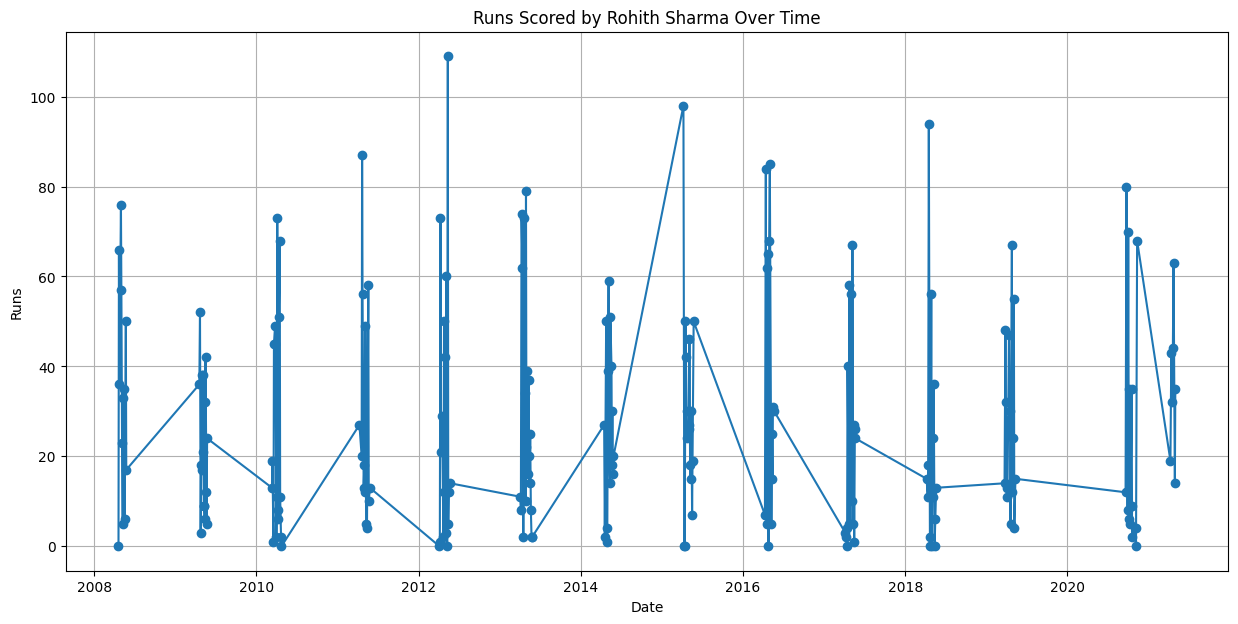

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

#Converting 'start_date' column to datetime if it's not already in datetime format
rohith_batting_stats['start_date'] = pd.to_datetime(rohith_batting_stats['start_date'])

#Plotting the data
plt.figure(figsize=(15, 7))
plt.plot(rohith_batting_stats['start_date'], rohith_batting_stats['runs_off_bat'], marker='o', linestyle='-')
plt.title('Runs Scored by Rohith Sharma Over Time')
plt.xlabel('Date')
plt.ylabel('Runs')
plt.grid(True)
plt.show()

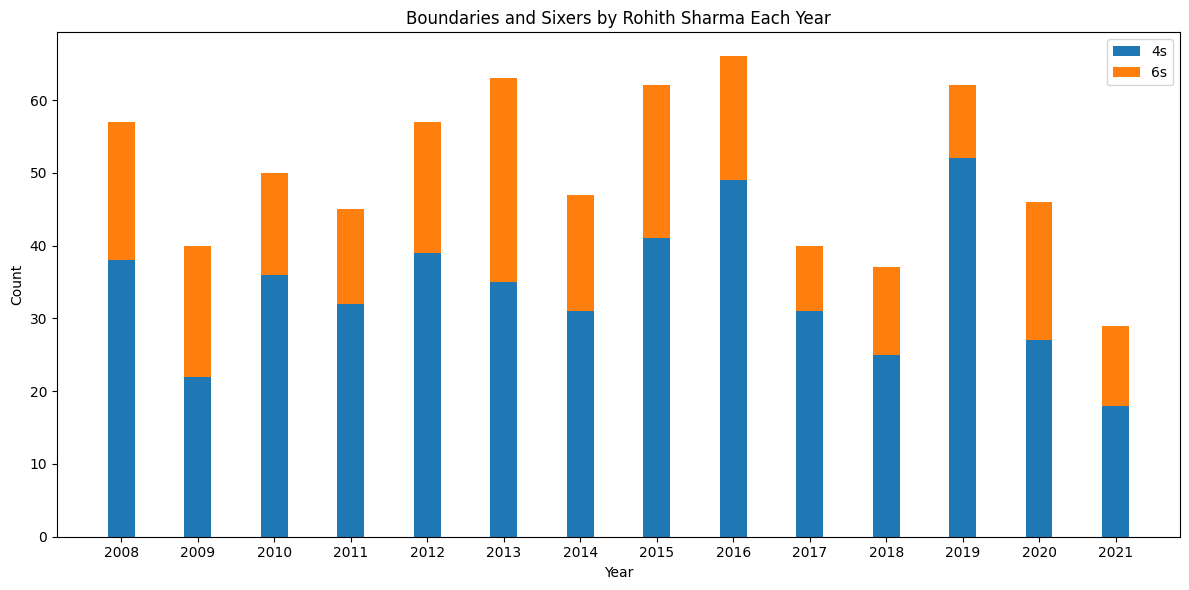

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

#converting it to datetime
rohith_batting_stats['start_date'] = pd.to_datetime(rohith_batting_stats['start_date'])

#Extracting the year from the 'start_date' column
rohith_batting_stats['year'] = rohith_batting_stats['start_date'].dt.year

#Grouping data by year and calculating the total boundaries and sixes for each year
yearly_stats = rohith_batting_stats.groupby('year').agg({'boundary_count': 'sum', 'sixer_count': 'sum'}).reset_index()

#Plotting the data
plt.figure(figsize=(12, 6))
bar_width = 0.35
plt.bar(yearly_stats['year'], yearly_stats['boundary_count'], bar_width, label='4s')
plt.bar(yearly_stats['year'], yearly_stats['sixer_count'], bar_width, bottom=yearly_stats['boundary_count'], label='6s')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Boundaries and Sixers by Rohith Sharma Each Year')
plt.xticks(yearly_stats['year']) 
plt.legend()
plt.tight_layout()
plt.show()

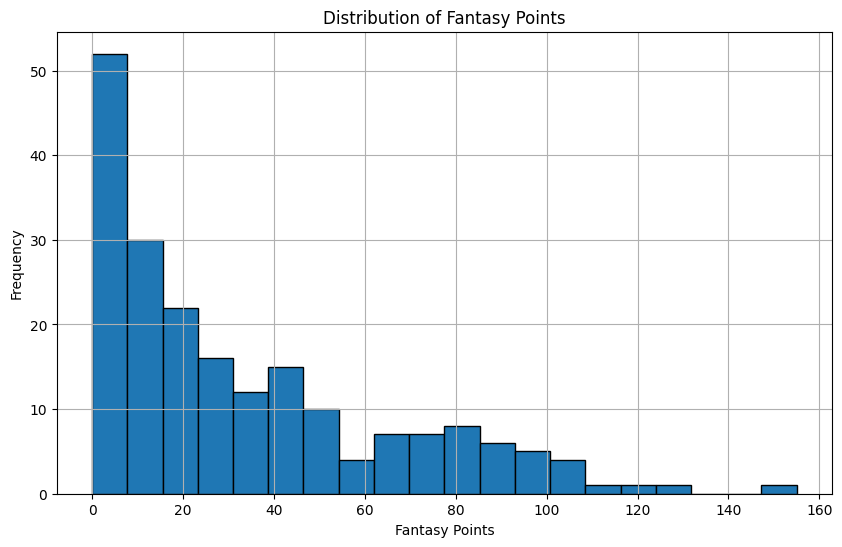

In [12]:
plt.figure(figsize=(10, 6))
plt.hist(rohith_batting_stats['fantasy_points'], bins=20, edgecolor='black')
plt.title('Distribution of Fantasy Points')
plt.xlabel('Fantasy Points')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [13]:
#importing the libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [14]:
#disaplaying the unique venues
unique_venues = rohith_batting_stats['venue'].unique()
unique_venues

array(['Eden Gardens', 'Rajiv Gandhi International Stadium, Uppal',
       'M Chinnaswamy Stadium', 'MA Chidambaram Stadium, Chepauk',
       'Sawai Mansingh Stadium', 'Feroz Shah Kotla',
       'Punjab Cricket Association Stadium, Mohali', 'Newlands',
       'Kingsmead', 'SuperSport Park', "St George's Park", 'Buffalo Park',
       'De Beers Diamond Oval', 'New Wanderers Stadium',
       'Dr DY Patil Sports Academy', 'Barabati Stadium',
       'Sardar Patel Stadium, Motera', 'Brabourne Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Wankhede Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium', 'Sheikh Zayed Stadium',
       'Dubai International Cricket Stadium', 'Sharjah Cricket Stadium',
       'Punjab Cricket Association IS Bindra Stadium, Mohali',
       'Maharashtra Cricket Association Stadium', 'Green Park',
       'Saurashtra Cricket Association Stadiu

In [15]:
#Transforming the venue column
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
rohith_batting_stats['venue_encoded'] = label_encoder.fit_transform(rohith_batting_stats['venue'])
rohith_batting_stats['venue_encoded']

0       9
1      27
2      27
3      27
4      15
       ..
197    19
198    19
199    19
200     1
201     1
Name: venue_encoded, Length: 202, dtype: int32

In [16]:
rohith_batting_stats

,start_date,match_id,venue,innings,bowling_team,ball,runs_off_bat,boundary_count,sixer_count,half_century_count,century_count,strike_rate,fantasy_points,year,venue_encoded
0,2008-04-20,335986,Eden Gardens,1,Kolkata Knight Riders,3,0,0,0,0,0,0.000000,0,2008,9
1,2008-04-22,335988,"Rajiv Gandhi International Stadium, Uppal",1,Delhi Daredevils,37,66,6,4,1,0,178.378378,88,2008,27
2,2008-04-24,335990,"Rajiv Gandhi International Stadium, Uppal",1,Rajasthan Royals,30,36,3,1,0,0,120.000000,41,2008,27
3,2008-05-01,335999,"Rajiv Gandhi International Stadium, Uppal",1,Kings XI Punjab,42,76,10,2,1,0,180.952381,98,2008,27
4,2008-05-03,336034,M Chinnaswamy Stadium,2,Royal Challengers Bangalore,43,57,5,3,1,0,132.558140,76,2008,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,2021-04-17,1254066,"MA Chidambaram Stadium, Chepauk, Chennai",1,Sunrisers Hyderabad,26,32,2,2,0,0,123.076923,38,2021,19
198,2021-04-20,1254070,"MA Chidambaram Stadium, Chepauk, Chennai",1,Delhi Capitals,30,44,3,3,0,0,146.666667,53,2021,19
199,2021-04-23,1254074,"MA Chidambaram Stadium, Chepauk, Chennai",1,Punjab Kings,52,63,5,2,1,0,121.153846,80,2021,19
200,2021-04-29,1254081,"Arun Jaitley Stadium, Delhi",2,Rajasthan Royals,17,14,0,1,0,0,82.352941,16,2021,1


In [17]:
#Transforming the bowling team column
label_encoder = LabelEncoder()
rohith_batting_stats['bowling_team'] = label_encoder.fit_transform(rohith_batting_stats['bowling_team'])
unique_venues = rohith_batting_stats['bowling_team'].unique()
unique_venues

array([ 6,  3, 10,  5, 13,  0,  7,  8,  1, 14, 12,  4, 11,  2,  9])

In [18]:
rohith_batting_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_date          202 non-null    datetime64[ns]
 1   match_id            202 non-null    int64         
 2   venue               202 non-null    object        
 3   innings             202 non-null    int64         
 4   bowling_team        202 non-null    int32         
 5   ball                202 non-null    int64         
 6   runs_off_bat        202 non-null    int64         
 7   boundary_count      202 non-null    int64         
 8   sixer_count         202 non-null    int64         
 9   half_century_count  202 non-null    int32         
 10  century_count       202 non-null    int32         
 11  strike_rate         202 non-null    float64       
 12  fantasy_points      202 non-null    int64         
 13  year                202 non-null    int32         

In [19]:
rohith_batting_stats

,start_date,match_id,venue,innings,bowling_team,ball,runs_off_bat,boundary_count,sixer_count,half_century_count,century_count,strike_rate,fantasy_points,year,venue_encoded
0,2008-04-20,335986,Eden Gardens,1,6,3,0,0,0,0,0,0.000000,0,2008,9
1,2008-04-22,335988,"Rajiv Gandhi International Stadium, Uppal",1,3,37,66,6,4,1,0,178.378378,88,2008,27
2,2008-04-24,335990,"Rajiv Gandhi International Stadium, Uppal",1,10,30,36,3,1,0,0,120.000000,41,2008,27
3,2008-05-01,335999,"Rajiv Gandhi International Stadium, Uppal",1,5,42,76,10,2,1,0,180.952381,98,2008,27
4,2008-05-03,336034,M Chinnaswamy Stadium,2,13,43,57,5,3,1,0,132.558140,76,2008,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,2021-04-17,1254066,"MA Chidambaram Stadium, Chepauk, Chennai",1,14,26,32,2,2,0,0,123.076923,38,2021,19
198,2021-04-20,1254070,"MA Chidambaram Stadium, Chepauk, Chennai",1,2,30,44,3,3,0,0,146.666667,53,2021,19
199,2021-04-23,1254074,"MA Chidambaram Stadium, Chepauk, Chennai",1,9,52,63,5,2,1,0,121.153846,80,2021,19
200,2021-04-29,1254081,"Arun Jaitley Stadium, Delhi",2,10,17,14,0,1,0,0,82.352941,16,2021,1


In [20]:
# Batting prediction using additional Variables 
# Data Preparation
features = ['ball','runs_off_bat' ,'boundary_count', 'sixer_count', 'strike_rate','half_century_count', 'century_count', 'venue_encoded', 'innings','bowling_team']
X = rohith_batting_stats[features]
y = rohith_batting_stats['fantasy_points']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
lr2 = LinearRegression()
lr2.fit(X_train, y_train)
y_pred_lr2 = lr2.predict(X_test)

# SVM with Linear Kernel
svm_linear2 = SVR(kernel='linear')
svm_linear2.fit(X_train, y_train)
y_pred_svm_linear2 = svm_linear2.predict(X_test)

# SVM with Polynomial Kernel
svm_poly2 = SVR(kernel='poly')
svm_poly2.fit(X_train, y_train)
y_pred_svm_poly2 = svm_poly2.predict(X_test)

# Evaluation
models = ['Linear Regression with additional variable', 'SVM Linear with Additional Variable', 'SVM Polynomial with Additional Variable']
predictions = [y_pred_lr2, y_pred_svm_linear2, y_pred_svm_poly2]

for i, model in enumerate(models):
    print(f"{model} Metrics:")
    print("MAE:", mean_absolute_error(y_test, predictions[i]))
    print("MSE:", mean_squared_error(y_test, predictions[i]))
    print("R2 Score:", r2_score(y_test, predictions[i]))
    print("-------------------------------")

Linear Regression with additional variable Metrics:
MAE: 0.7189944525075098
MSE: 5.6769550968134395
R2 Score: 0.9948011419132489
-------------------------------
SVM Linear with Additional Variable Metrics:
MAE: 0.5344971442719724
MSE: 6.230743001130357
R2 Score: 0.9942939924509747
-------------------------------
SVM Polynomial with Additional Variable Metrics:
MAE: 5.384273067039109
MSE: 45.18365678244493
R2 Score: 0.958621582266124
-------------------------------


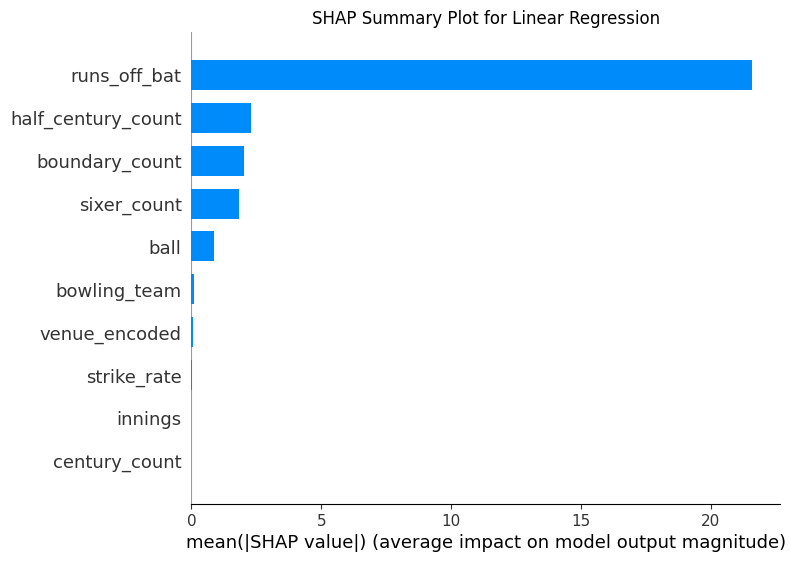

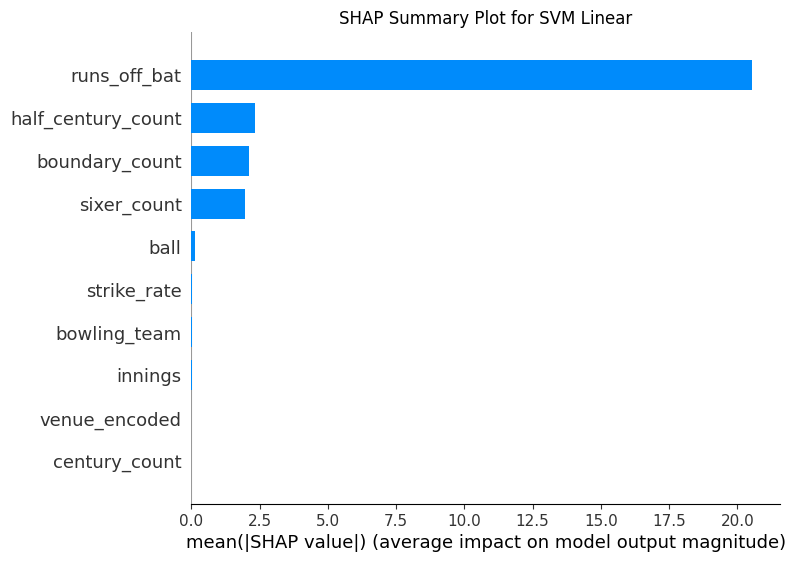

In [21]:
import shap

# List of models and corresponding names
models = [lr2, svm_linear2]
model_names = ['Linear Regression', 'SVM Linear']

# Initialize a SHAP explainer and calculate feature importance for each model
for i, model in enumerate(models):
    # Initialize a SHAP explainer for the model
    explainer = shap.Explainer(model, X_train)
    
    # Calculate SHAP values for the test data
    shap_values = explainer.shap_values(X_test)
    
    # Summary Plot of Feature Importance
    plt.figure(figsize=(8, 6))
    shap.summary_plot(shap_values, X_test, feature_names=features, plot_type='bar', show=False)
    plt.title(f"SHAP Summary Plot for {model_names[i]}")
    plt.show()


In [22]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

#Selecting relevant columns
features = ['runs_off_bat', 'ball', 'boundary_count', 'sixer_count', 'strike_rate', 'half_century_count', 'century_count','innings']
target = 'fantasy_points'

X = rohith_batting_stats[features].values
y = rohith_batting_stats[target].values

#Calculating the index for splitting the data
split_index = int(0.8 * len(y))  # 80% for training, 20% for testing

#Splitting data into train and test sets based on the index
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

#Creating empty lists to store sequences and targets with window size 10
x_windows_train = []
y_windows_train = []

#Creating rolling window sequences for training data with window size 10
for i in range(10, len(y_train)):
    x_train = X_train[i-10:i, :]  #Creating input sequences of length 10
    y_train_val = y_train[i]      #Corresponding target for the sequence
    x_windows_train.append(x_train)
    y_windows_train.append(y_train_val)

#Converting lists to numpy arrays for training data
x_windows_train = np.array(x_windows_train)
y_windows_train = np.array(y_windows_train)

#Reshaping input data to fit the LSTM input shape for training data
x_windows_train = x_windows_train.reshape((x_windows_train.shape[0], x_windows_train.shape[1], x_windows_train.shape[2]))

#Creating the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(x_windows_train.shape[1], x_windows_train.shape[2])))
model.add(Dense(1))  #Output layer with one neuron for regression
#Compiling the model
model.compile(optimizer='adam', loss='mse')

#Training the model
model.fit(x_windows_train, y_windows_train, epochs=50, batch_size=32, verbose=1)

#Evaluating the model on training data
train_predictions = model.predict(x_windows_train)
train_r_squared = r2_score(y_train[10:], train_predictions)
train_mae = mean_absolute_error(y_train[10:], train_predictions)
train_rmse = np.sqrt(mean_squared_error(y_train[10:], train_predictions))

print("Training Metrics:")
print(f"Mean Absolute Error: {train_mae}")
print(f"Root Mean Squared Error: {train_rmse}")

#Creating empty lists to store sequences for testing data with window size 10
x_windows_test = []

#Creating rolling window sequences for testing data with window size 10
for i in range(10, len(y_test)):
    x_test = X_test[i-10:i, :]  # Creating input sequences of length 10 for testing data
    x_windows_test.append(x_test)

#Converting list to numpy array for testing data
x_windows_test = np.array(x_windows_test)

#Reshaping input data to fit the LSTM input shape for testing data
x_windows_test = x_windows_test.reshape((x_windows_test.shape[0], x_windows_test.shape[1], x_windows_test.shape[2])) 

#Predictions on testing data
test_predictions = model.predict(x_windows_test)

#Evaluating the model on testing data
test_r_squared = r2_score(y_test[10:], test_predictions)
test_mae = mean_absolute_error(y_test[10:], test_predictions)
test_rmse = np.sqrt(mean_squared_error(y_test[10:], test_predictions))

print("\nTesting Metrics:")
print(f"Mean Absolute Error: {test_mae}")
print(f"Root Mean Squared Error: {test_rmse}")

Epoch 1/50
5/5 [==============================] - 3s 10ms/step - loss: 2756.2725
Epoch 2/50
5/5 [==============================] - 0s 7ms/step - loss: 1607.3807
Epoch 3/50
5/5 [==============================] - 0s 17ms/step - loss: 1238.0005
Epoch 4/50
5/5 [==============================] - 0s 9ms/step - loss: 1150.6514
Epoch 5/50
5/5 [==============================] - 0s 21ms/step - loss: 1099.4945
Epoch 6/50
5/5 [==============================] - 0s 8ms/step - loss: 1030.7208
Epoch 7/50
5/5 [==============================] - 0s 7ms/step - loss: 1031.6250
Epoch 8/50
5/5 [==============================] - 0s 15ms/step - loss: 1001.9108
Epoch 9/50
5/5 [==============================] - 0s 10ms/step - loss: 970.4131
Epoch 10/50
5/5 [==============================] - 0s 8ms/step - loss: 942.1437
Epoch 11/50
5/5 [==============================] - 0s 8ms/step - loss: 882.0052
Epoch 12/50
5/5 [==============================] - 0s 16ms/step - loss: 826.4711
Epoch 13/50
5/5 [==================

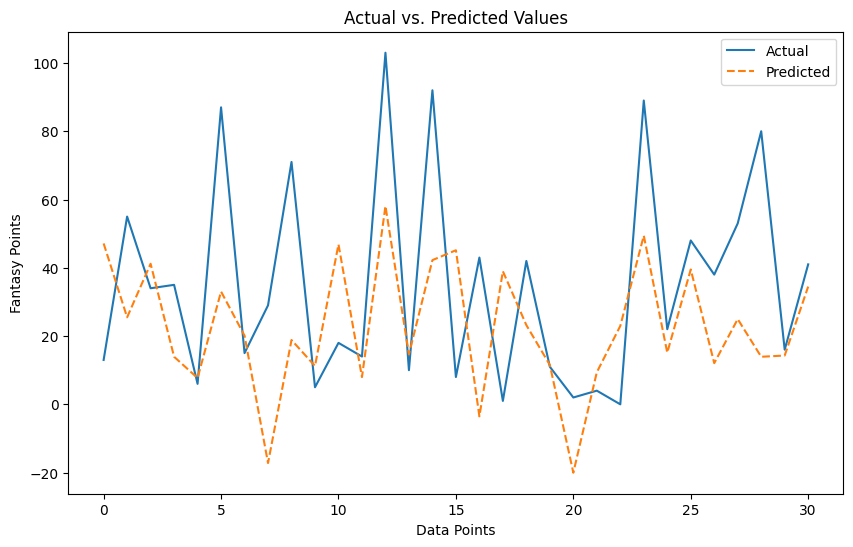

In [23]:
import matplotlib.pyplot as plt
#Plotting actual vs. predicted values for the test data
plt.figure(figsize=(10, 6))
plt.plot(y_test[10:], label='Actual')
plt.plot(test_predictions, label='Predicted', linestyle='--')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Data Points')
plt.ylabel('Fantasy Points')
plt.legend()
plt.show()

In [24]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Dropout

#Selecting relevant columns
features = ['runs_off_bat', 'ball', 'boundary_count', 'sixer_count', 'strike_rate', 'half_century_count', 'century_count','innings']
target = 'fantasy_points'

X = rohith_batting_stats[features].values
y = rohith_batting_stats[target].values

#Calculating the index for splitting the data
split_index = int(0.8 * len(y))  # 80% for training, 20% for testing

#Splitting data into train and test sets based on the index
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

#Creating empty lists to store sequences and targets with window size 10
x_windows_train = []
y_windows_train = []

#Creating rolling window sequences for training data with window size 10
for i in range(10, len(y_train)):
    x_train = X_train[i-10:i, :]  # Creating input sequences of length 10
    y_train_val = y_train[i]      # Corresponding target for the sequence
    x_windows_train.append(x_train)
    y_windows_train.append(y_train_val)

#Converting lists to numpy arrays for training data
x_windows_train = np.array(x_windows_train)
y_windows_train = np.array(y_windows_train)

#Reshaping input data to fit the LSTM input shape for training data
x_windows_train = x_windows_train.reshape((x_windows_train.shape[0], x_windows_train.shape[1], x_windows_train.shape[2]))

#Creating the Bidirectional LSTM model with Dropout regularization
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu', return_sequences=True), input_shape=(x_windows_train.shape[1], x_windows_train.shape[2])))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(50, activation='relu')))
model.add(Dropout(0.2))
model.add(Dense(1))  # Output layer with one neuron for regression

model.compile(optimizer='adam', loss='mse')  # Compiling the model

#Training the model
model.fit(x_windows_train, y_windows_train, epochs=50, batch_size=32, verbose=1)

#Evaluating the model on training data
train_predictions = model.predict(x_windows_train)
train_r_squared = r2_score(y_train[10:], train_predictions)
train_mae = mean_absolute_error(y_train[10:], train_predictions)
train_rmse = np.sqrt(mean_squared_error(y_train[10:], train_predictions))

print("Training Metrics:")
print(f"Mean Absolute Error: {train_mae}")
print(f"Root Mean Squared Error: {train_rmse}")

#Creating empty lists to store sequences for testing data with window size 10
x_windows_test = []

#Creating rolling window sequences for testing data with window size 10
for i in range(10, len(y_test)):
    x_test = X_test[i-10:i, :]  # Creating input sequences of length 10 for testing data
    x_windows_test.append(x_test)

#Convert list to numpy array for testing data
x_windows_test = np.array(x_windows_test)

#Reshaping input data to fit the LSTM input shape for testing data
x_windows_test = x_windows_test.reshape((x_windows_test.shape[0], x_windows_test.shape[1], x_windows_test.shape[2])) 

#Predictions on testing data
test_predictions = model.predict(x_windows_test)

#Evaluating the model on testing data
test_r_squared = r2_score(y_test[10:], test_predictions)
test_mae = mean_absolute_error(y_test[10:], test_predictions)
test_rmse = np.sqrt(mean_squared_error(y_test[10:], test_predictions))

print("\nTesting Metrics:")
print(f"Mean Absolute Error: {test_mae}")
print(f"Root Mean Squared Error: {test_rmse}")

Epoch 1/50
5/5 [==============================] - 14s 42ms/step - loss: 4564.7788
Epoch 2/50
5/5 [==============================] - 0s 67ms/step - loss: 3417.0161
Epoch 3/50
5/5 [==============================] - 0s 31ms/step - loss: 2623.8723
Epoch 4/50
5/5 [==============================] - 0s 39ms/step - loss: 2187.1072
Epoch 5/50
5/5 [==============================] - 0s 63ms/step - loss: 2019.0699
Epoch 6/50
5/5 [==============================] - 0s 55ms/step - loss: 1859.1902
Epoch 7/50
5/5 [==============================] - 0s 37ms/step - loss: 1869.5518
Epoch 8/50
5/5 [==============================] - 0s 41ms/step - loss: 1697.6498
Epoch 9/50
5/5 [==============================] - 0s 48ms/step - loss: 1443.8248
Epoch 10/50
5/5 [==============================] - 0s 46ms/step - loss: 1487.5751
Epoch 11/50
5/5 [==============================] - 0s 59ms/step - loss: 1300.7902
Epoch 12/50
5/5 [==============================] - 0s 38ms/step - loss: 1374.3247
Epoch 13/50
5/5 [=======

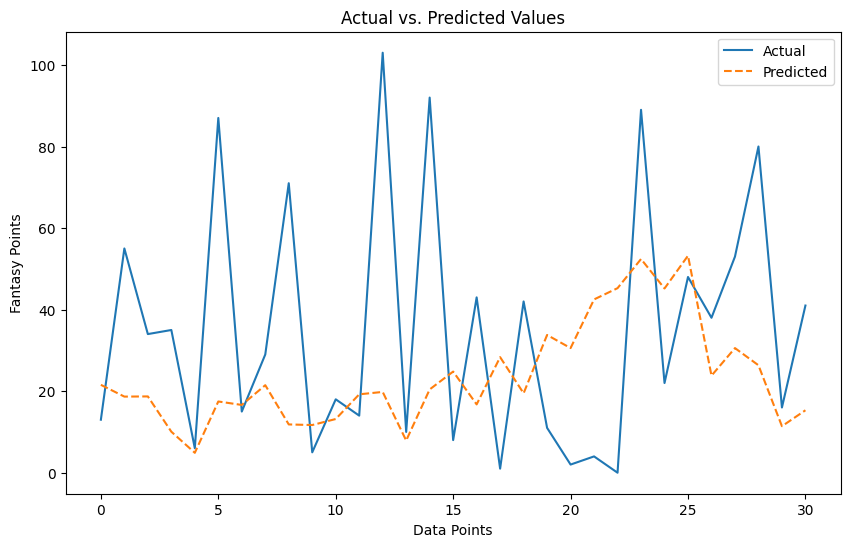

In [25]:
import matplotlib.pyplot as plt
#Plotting actual vs. predicted values for the test data
plt.figure(figsize=(10, 6))
plt.plot(y_test[10:], label='Actual')
plt.plot(test_predictions, label='Predicted', linestyle='--')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Data Points')
plt.ylabel('Fantasy Points')
plt.legend()
plt.show()

In [26]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

#Selecting relevant columns
features = ['runs_off_bat', 'ball', 'boundary_count', 'sixer_count', 'strike_rate', 'half_century_count', 'century_count', 'innings']
target = 'fantasy_points'

X = rohith_batting_stats[features].values
y = rohith_batting_stats[target].values

#Calculating the index for splitting the data
split_index = int(0.8 * len(y))  # 80% for training, 20% for testing

#Splitting data into train and test sets based on the index
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

#Creating empty lists to store sequences and targets with window size 10
x_windows_train = []
y_windows_train = []

#Creating rolling window sequences for training data with window size 10
for i in range(10, len(y_train)):
    x_train = X_train[i-10:i, :]  #Creating input sequences of length 10
    y_train_val = y_train[i]      #Corresponding target for the sequence
    x_windows_train.append(x_train)
    y_windows_train.append(y_train_val)

#Converting lists to numpy arrays for training data
x_windows_train = np.array(x_windows_train)
y_windows_train = np.array(y_windows_train)

#Reshaping input data to fit the CNN input shape for training data
x_windows_train = x_windows_train.reshape((x_windows_train.shape[0], x_windows_train.shape[1], x_windows_train.shape[2]))

#Creating the CNN model with Dropout regularization
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(x_windows_train.shape[1], x_windows_train.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))  # Output layer with one neuron for regression

model.compile(optimizer='adam', loss='mse')  # Compiling the model

#Training the model
model.fit(x_windows_train, y_windows_train, epochs=50, batch_size=32, verbose=1)

#Evaluating the model on training data
train_predictions = model.predict(x_windows_train)
train_r_squared = r2_score(y_train[10:], train_predictions)
train_mae = mean_absolute_error(y_train[10:], train_predictions)
train_rmse = np.sqrt(mean_squared_error(y_train[10:], train_predictions))

print("Training Metrics:")
print(f"Mean Absolute Error: {train_mae}")
print(f"Root Mean Squared Error: {train_rmse}")

#Creating empty lists to store sequences for testing data with window size 10
x_windows_test = []

#Creating rolling window sequences for testing data with window size 10
for i in range(10, len(y_test)):
    x_test = X_test[i-10:i, :]  # Creating input sequences of length 10 for testing data
    x_windows_test.append(x_test)

#Convert list to numpy array for testing data
x_windows_test = np.array(x_windows_test)

#Reshaping input data to fit the CNN input shape for testing data
x_windows_test = x_windows_test.reshape((x_windows_test.shape[0], x_windows_test.shape[1], x_windows_test.shape[2])) 

#Predictions on testing data
test_predictions = model.predict(x_windows_test)

#Evaluating the model on testing data
test_r_squared = r2_score(y_test[10:], test_predictions)
test_mae = mean_absolute_error(y_test[10:], test_predictions)
test_rmse = np.sqrt(mean_squared_error(y_test[10:], test_predictions))

print("\nTesting Metrics:")
print(f"Mean Absolute Error: {test_mae}")
print(f"Root Mean Squared Error: {test_rmse}")

Epoch 1/50
5/5 [==============================] - 2s 5ms/step - loss: 1599.9025
Epoch 2/50
5/5 [==============================] - 0s 7ms/step - loss: 1460.3153
Epoch 3/50
5/5 [==============================] - 0s 8ms/step - loss: 1259.5914
Epoch 4/50
5/5 [==============================] - 0s 5ms/step - loss: 1225.7378
Epoch 5/50
5/5 [==============================] - 0s 8ms/step - loss: 1081.9377
Epoch 6/50
5/5 [==============================] - 0s 7ms/step - loss: 1195.5842
Epoch 7/50
5/5 [==============================] - 0s 5ms/step - loss: 1087.7455
Epoch 8/50
5/5 [==============================] - 0s 4ms/step - loss: 1057.6582
Epoch 9/50
5/5 [==============================] - 0s 7ms/step - loss: 1022.2930
Epoch 10/50
5/5 [==============================] - 0s 7ms/step - loss: 974.5003
Epoch 11/50
5/5 [==============================] - 0s 4ms/step - loss: 952.7899
Epoch 12/50
5/5 [==============================] - 0s 5ms/step - loss: 957.9476
Epoch 13/50
5/5 [=======================

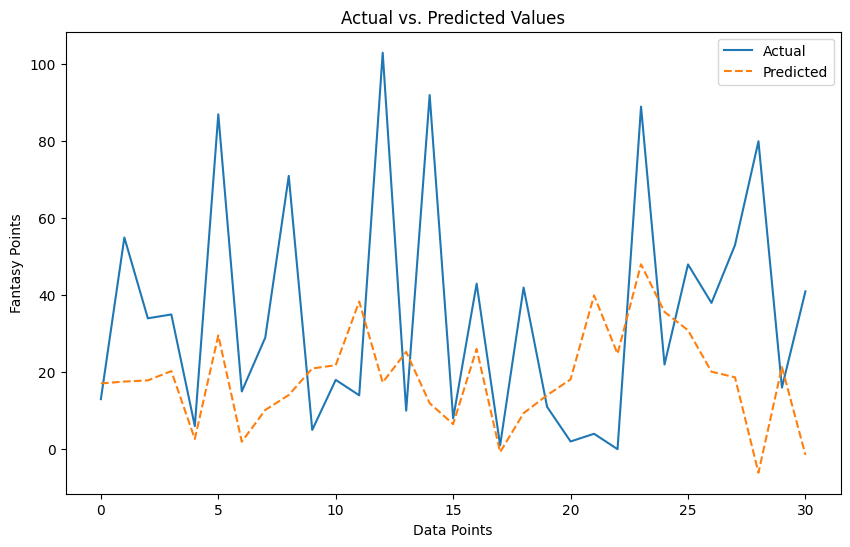

In [27]:
import matplotlib.pyplot as plt
#Plotting actual vs. predicted values for the test data
plt.figure(figsize=(10, 6))
plt.plot(y_test[10:], label='Actual')
plt.plot(test_predictions, label='Predicted', linestyle='--')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Data Points')
plt.ylabel('Fantasy Points')
plt.legend()
plt.show()

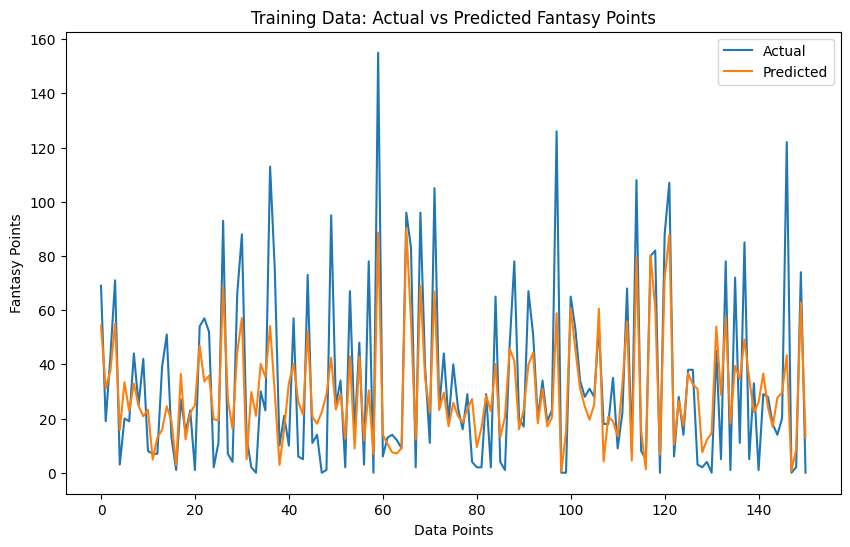

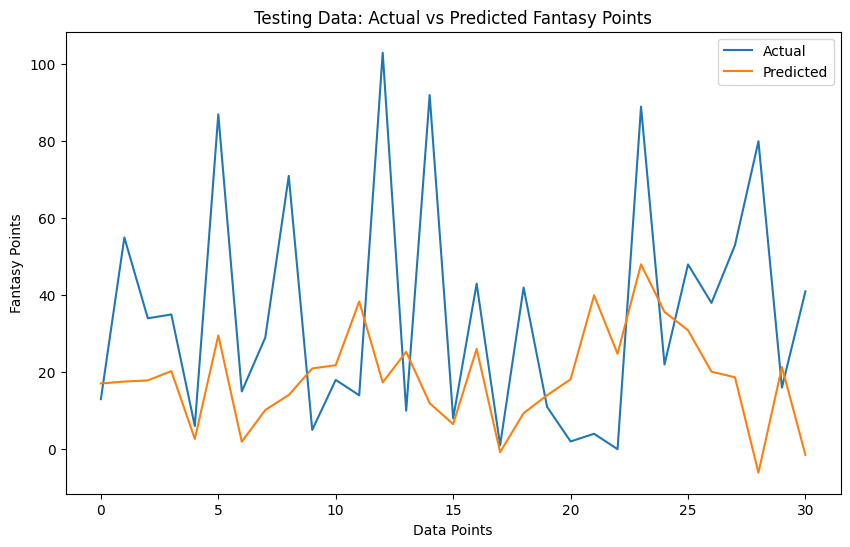

In [28]:
import matplotlib.pyplot as plt

# Plotting training predictions vs actual values
plt.figure(figsize=(10, 6))
plt.plot(y_train[10:], label='Actual')
plt.plot(train_predictions, label='Predicted')
plt.title('Training Data: Actual vs Predicted Fantasy Points')
plt.xlabel('Data Points')
plt.ylabel('Fantasy Points')
plt.legend()
plt.show()

# Plotting testing predictions vs actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test[10:], label='Actual')
plt.plot(test_predictions, label='Predicted')
plt.title('Testing Data: Actual vs Predicted Fantasy Points')
plt.xlabel('Data Points')
plt.ylabel('Fantasy Points')
plt.legend()
plt.show()

In [29]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

#Assuming your data is loaded into 'kohli_batting_stats'

#Selecting relevant columns
features = ['runs_off_bat', 'ball', 'boundary_count', 'sixer_count', 'strike_rate', 'half_century_count', 'century_count', 'innings']
target = 'fantasy_points'

X = rohith_batting_stats[features].values
y = rohith_batting_stats[target].values

#Calculate the index for splitting the data
split_index = int(0.8 * len(y))  # 80% for training, 20% for testing

#Splitting data into train and test sets based on the index
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

#Creating empty lists to store sequences and targets with window size 10
x_windows_train = []
y_windows_train = []

#Creating rolling window sequences for training data with window size 10
for i in range(10, len(y_train)):
    x_train = X_train[i-10:i, :]  # Creating input sequences of length 10
    y_train_val = y_train[i]      # Corresponding target for the sequence
    x_windows_train.append(x_train)
    y_windows_train.append(y_train_val)

#Convert lists to numpy arrays for training data
x_windows_train = np.array(x_windows_train)
y_windows_train = np.array(y_windows_train)

#Reshaping input data to fit the RNN input shape for training data
x_windows_train = x_windows_train.reshape((x_windows_train.shape[0], x_windows_train.shape[1], x_windows_train.shape[2]))

#Creating the GRU model
model = Sequential()
model.add(GRU(50, activation='relu', input_shape=(x_windows_train.shape[1], x_windows_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))  # Output layer with one neuron for regression

model.compile(optimizer='adam', loss='mse')  # Compiling the model

#Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

#Training the model with early stopping
model.fit(x_windows_train, y_windows_train, epochs=50, batch_size=32, verbose=1, validation_split=0.2, callbacks=[early_stopping])

#Evaluating the model on training data
train_predictions = model.predict(x_windows_train)
train_r_squared = r2_score(y_train[10:], train_predictions)
train_mae = mean_absolute_error(y_train[10:], train_predictions)
train_rmse = np.sqrt(mean_squared_error(y_train[10:], train_predictions))

print("Training Metrics:")
print(f"Mean Absolute Error: {train_mae}")
print(f"Root Mean Squared Error: {train_rmse}")

#Creating rolling window sequences for testing data with window size 10
x_windows_test = []
for i in range(10, len(y_test)):
    x_test = X_test[i-10:i, :]  # Creating input sequences of length 10 for testing data
    x_windows_test.append(x_test)

#Convert list to numpy array for testing data
x_windows_test = np.array(x_windows_test)

#Reshaping input data to fit the RNN input shape for testing data
x_windows_test = x_windows_test.reshape((x_windows_test.shape[0], x_windows_test.shape[1], x_windows_test.shape[2])) 

#Predictions on testing data
test_predictions = model.predict(x_windows_test)

#Evaluating the model on testing data
test_r_squared = r2_score(y_test[10:], test_predictions)
test_mae = mean_absolute_error(y_test[10:], test_predictions)
test_rmse = np.sqrt(mean_squared_error(y_test[10:], test_predictions))

print("\nTesting Metrics:")
print(f"Mean Absolute Error: {test_mae}")
print(f"Root Mean Squared Error: {test_rmse}")

Epoch 1/50
4/4 [==============================] - 5s 257ms/step - loss: 1272.5941 - val_loss: 1375.2673
Epoch 2/50
4/4 [==============================] - 0s 45ms/step - loss: 1221.2791 - val_loss: 1335.0232
Epoch 3/50
4/4 [==============================] - 0s 53ms/step - loss: 1200.5757 - val_loss: 1297.4912
Epoch 4/50
4/4 [==============================] - 0s 55ms/step - loss: 1109.1754 - val_loss: 1245.7103
Epoch 5/50
4/4 [==============================] - 0s 28ms/step - loss: 1218.8674 - val_loss: 1228.4058
Epoch 6/50
4/4 [==============================] - 0s 30ms/step - loss: 1168.7330 - val_loss: 1218.9391
Epoch 7/50
4/4 [==============================] - 0s 42ms/step - loss: 1061.1578 - val_loss: 1213.5404
Epoch 8/50
4/4 [==============================] - 0s 43ms/step - loss: 1115.7261 - val_loss: 1221.4364
Epoch 9/50
4/4 [==============================] - 0s 55ms/step - loss: 1123.4117 - val_loss: 1230.3173
Epoch 10/50
4/4 [==============================] - 0s 53ms/step - loss: 